In [3]:
# Import necessary libraries
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set_theme()

In [4]:
import nltk
import os

# Set NLTK data path (optional, but good practice)
nltk.data.path.append(r'C:\Users\keefg001\nltk_data')  # Or your preferred path

# Download punkt (for sentence tokenization) - ONLY if you haven't already
# nltk.download('punkt', download_dir=r'C:\Users\keefg001\nltk_data')

# Download stopwords (for stop word lists) - ONLY if you haven't already
nltk.download('stopwords', download_dir=r'C:\Users\keefg001\nltk_data')

# Access stop words correctly
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

# Now you can use stopwords_list
print(stopwords_list[:10])  # Print the first 10 stop words (for example)

# Example of using punkt for sentence tokenization:
from nltk.tokenize import sent_tokenize
text = "This is a sentence. This is another one!"
sentences = sent_tokenize(text)
print(sentences)

# Example of using word_tokenize (which relies on punkt)
from nltk.tokenize import word_tokenize
words = word_tokenize(text)
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['This is a sentence.', 'This is another one!']
['This', 'is', 'a', 'sentence', '.', 'This', 'is', 'another', 'one', '!']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keefg001\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df=pd.read_csv('train.csv')
df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [6]:
df.shape

(5520, 5)

In [7]:
df_copy=df.copy()
df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [8]:
df_copy.columns.tolist()

['headlines', 'description', 'content', 'url', 'category']

In [15]:
column_name = 'your_column_name'  # Replace with the actual name of your column
category_types = list(df_copy['category'].unique())
print(category_types)

['business', 'sports', 'entertainment', 'education', 'technology']


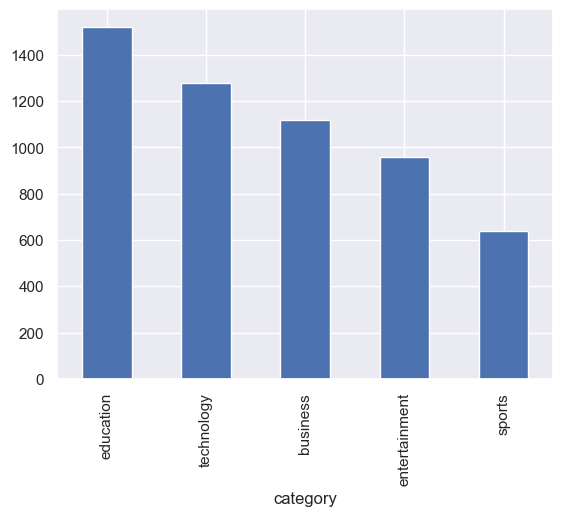

In [17]:
# Visualise the distribution of train.csv for the categories
df_copy['category'].value_counts().plot(kind = 'bar')
plt.show()

# Extracting just the domain from the url column

In [20]:
def extract_domain(url):
    if isinstance(url, str):
        try:
            from urllib.parse import urlparse
            return urlparse(url).netloc
        except:
            return None
    return None

df_copy['url'] = df_copy['url'].apply(extract_domain)

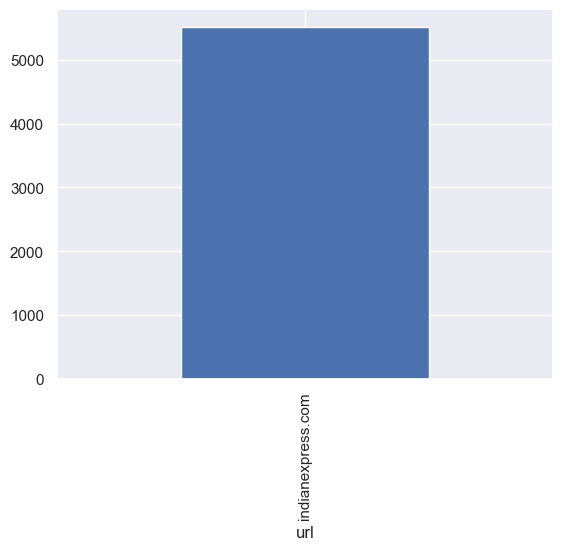

In [22]:
# Visualise the distribution of train.csv for the categories
df_copy['url'].value_counts().plot(kind = 'bar')
plt.show()

# Removing url from Healines, Description and Content

In [25]:

pattern_url = r'http[s]?://(?:[A-Za-z0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'  # Corrected regex (see below)
subs_url = r'url-web'

# Apply the replacement to specific columns
columns_to_replace = ['headlines', 'description', 'content']

for col in columns_to_replace:
    df_copy[col] = df_copy[col].astype(str).replace(to_replace=pattern_url, value=subs_url, regex=True)


In [27]:
df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,indianexpress.com,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,indianexpress.com,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,indianexpress.com,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,indianexpress.com,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,indianexpress.com,business


# Checking to make sure the text is a string, removing punctuaction and special characters and converting text to lower cases

In [30]:
import re

def clean_text(text):
    if isinstance(text, str): 
        text = re.sub(r'[^\w\s]', '', text, re.UNICODE)  
        text = text.lower() 
        return text
    return text

df_copy['headlines'] = df_copy['headlines'].apply(clean_text)
df_copy['description'] = df_copy['description'].apply(clean_text)
df_copy['content'] = df_copy['content'].apply(clean_text)

In [32]:
df_copy['description'].iloc[4556]

'darpas x65 aircraft features a revolutionary design that will be used to test a new air control system that could change an entire centurys worth of aircraft design paradigms'

# dividing text into a sequence of tokens 'Tokenisation'

In [35]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [37]:
# Tokenise the text using the TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_copy['tokens_Headlines'] = df_copy['headlines'].apply(tokeniser.tokenize)
df_copy['tokens_description'] = df_copy['description'].apply(tokeniser.tokenize)
df_copy['tokens_content'] = df_copy['content'].apply(tokeniser.tokenize)

In [38]:
df_copy['tokens_Headlines'].iloc[45]

['beyond',
 'mccain',
 'and',
 'tim',
 'hortons',
 'canadian',
 'investments',
 'in',
 'india',
 'span',
 'infra',
 'to',
 'fintech']

In [39]:
df_copy['tokens_description'].iloc[45]

['indian',
 'companies',
 'in',
 'canada',
 'are',
 'active',
 'in',
 'sectors',
 'like',
 'information',
 'technology',
 'software',
 'steel',
 'natural',
 'resources',
 'and',
 'banking']

In [40]:
df_copy['tokens_content'].iloc[45]

['while',
 'tim',
 'hortons',
 'and',
 'mccain',
 'foods',
 'might',
 'have',
 'the',
 'biggest',
 'brand',
 'recall',
 'when',
 'it',
 'comes',
 'to',
 'canadian',
 'businesses',
 'in',
 'india',
 'canadian',
 'investments',
 'in',
 'the',
 'country',
 'go',
 'far',
 'beyond',
 'coffee',
 'chains',
 'and',
 'frozen',
 'snacks',
 'canadian',
 'pension',
 'funds',
 'asset',
 'management',
 'companies',
 'and',
 'financial',
 'services',
 'and',
 'insurance',
 'players',
 'are',
 'invested',
 'in',
 'key',
 'sectors',
 'of',
 'indias',
 'economy',
 'including',
 'financial',
 'services',
 'financial',
 'technology',
 'infrastructure',
 'real',
 'estate',
 'information',
 'technology',
 'and',
 'energy',
 'among',
 'others',
 'according',
 'to',
 'the',
 'national',
 'investment',
 'promotion',
 'facilitation',
 'agency',
 'or',
 'invest',
 'india',
 'canada',
 'is',
 'the',
 '18thlargest',
 'foreign',
 'investor',
 'in',
 'india',
 'with',
 'a',
 'cumulative',
 'investment',
 'of',
 '331

# Steeming ~ Transforming to the root word

In [75]:
import nltk
from nltk.stem import PorterStemmer  

stemmer = PorterStemmer()

def df_copy_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]  

# 2. Use the created stemmer object in the apply function:
df_copy['stem_token_healines'] = df_copy['tokens_Headlines'].apply(df_copy_stemmer, args=(stemmer,))
df_copy['stem_token_description'] = df_copy['tokens_description'].apply(df_copy_stemmer, args=(stemmer,))
df_copy['stem_token_content'] = df_copy['tokens_content'].apply(df_copy_stemmer, args=(stemmer,))


In [76]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_Headlines']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_healines'][i]))

next                 --> next      
nmc                  --> nmc       
took                 --> took      
6500                 --> 6500      
comments             --> comment   
into                 --> into      
consideration        --> consider  
during               --> dure      
consultation         --> consult   
process              --> process   
says                 --> say       
health               --> health    
minister             --> minist    


In [77]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_description']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_description'][i]))

the                  --> the       
next                 --> next      
will                 --> will      
be                   --> be        
a                    --> a         
computerbased        --> computerbas
examination          --> examin    
based                --> base      
on                   --> on        
highquality          --> highqual  
multiplechoice       --> multiplechoic
questions            --> question  
mcq                  --> mcq       
focused              --> focus     
on                   --> on        
addressing           --> address   
higher               --> higher    
domains              --> domain    
of                   --> of        
knowledge            --> knowledg  
aligned              --> align     
to                   --> to        
competencies         --> compet    
expected             --> expect    
of                   --> of        
a                    --> a         
medical              --> medic     
graduate             -->

In [78]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_content']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_content'][i]))

the                  --> the       
national             --> nation    
exit                 --> exit      
test                 --> test      
next                 --> next      
regulations          --> regul     
were                 --> were      
framed               --> frame     
by                   --> by        
the                  --> the       
national             --> nation    
medical              --> medic     
commission           --> commiss   
nmc                  --> nmc       
after                --> after     
taking               --> take      
into                 --> into      
consideration        --> consider  
nearly               --> nearli    
6500                 --> 6500      
comments             --> comment   
received             --> receiv    
during               --> dure      
the                  --> the       
consultation         --> consult   
process              --> process   
union                --> union     
health               --> hea

# Lemmezation ~ Processing word to thier base or dictionary form  for Healines, Description and content columns

In [65]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

def df_copy_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [67]:
df_copy['lemma_tokens_Headlines'] = df_copy['tokens_Headlines'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy['lemma_tokens_description'] = df_copy['tokens_description'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy['lemma_tokens_content'] = df_copy['tokens_content'].apply(df_copy_lemma, args=(lemmatizer, ))

In [68]:
for i, t in enumerate(df_copy.iloc[280]['tokens_Headlines']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_Headlines'][i]))

no                   --> no        
proposal             --> proposal  
to                   --> to        
provide              --> provide   
duty                 --> duty      
concession           --> concession
on                   --> on        
import               --> import    
of                   --> of        
evs                  --> ev        
govt                 --> govt      


In [69]:
for i, t in enumerate(df_copy.iloc[280]['tokens_description']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_description'][i]))

at                   --> at        
present              --> present   
cars                 --> car       
imported             --> imported  
as                   --> a         
completely           --> completely
built                --> built     
units                --> unit      
cbus                 --> cbus      
attract              --> attract   
customs              --> custom    
duty                 --> duty      
ranging              --> ranging   
from                 --> from      
60                   --> 60        
per                  --> per       
cent                 --> cent      
to                   --> to        
100                  --> 100       
per                  --> per       
cent                 --> cent      
depending            --> depending 
on                   --> on        
engine               --> engine    
size                 --> size      
and                  --> and       
cost                 --> cost      
insurance            --> ins

In [70]:
for i, t in enumerate(df_copy.iloc[280]['tokens_content']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_content'][i]))

the                  --> the       
government           --> government
on                   --> on        
wednesday            --> wednesday 
said                 --> said      
it                   --> it        
is                   --> is        
not                  --> not       
considering          --> considering
any                  --> any       
proposal             --> proposal  
to                   --> to        
provide              --> provide   
duty                 --> duty      
concessions          --> concession
and                  --> and       
exemption            --> exemption 
from                 --> from      
local                --> local     
value                --> value     
addition             --> addition  
for                  --> for       
import               --> import    
of                   --> of        
electric             --> electric  
vehicles             --> vehicle   
into                 --> into      
the                  --> th

# Stopwords

In [83]:
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)  # Download stopwords if you haven't already
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return " ".join(words)
    return text

df_copy['content'] = df_copy['content'].apply(remove_stopwords) 
df_copy['description'] = df_copy['description'].apply(remove_stopwords)
df_copy['headlines'] = df_copy['headlines'].apply(remove_stopwords)